# Initialization 

In [1]:
import numpy as np 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
import matplotlib.pyplot as plt

# Checking the tensorflow version

In [2]:
print(tf.__version__)

1.15.0


In [3]:
x = tf.Variable(5,name="X")
y = tf.Variable(7,name="Y")
f=(x*x*y) + y +2
f2=(x*x*y)
result =None


In [4]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Method 0
## Using Initializer 


In [5]:
sess = tf.Session()
sess.run(x.initializer)

print('X => ', x.value())

sess.run(y.initializer)

print('Y => ',y.value())
result = sess.run(f)

print('result => ',result)

X =>  Tensor("X/read:0", shape=(), dtype=int32)
Y =>  Tensor("Y/read:0", shape=(), dtype=int32)
result =>  184


# Method 1
## Intializing the Session

In [6]:
with tf.Session() as sess:
    x.initializer.run() #tf.get_default_session.run(x.initializer)
    print('x => ',x.eval())
    y.initializer.run()
    print('y => ',y.eval())
    result=f.eval()     #tf.get_default_session.run(f)
    print('eval => ',f.eval())
 

x =>  5
y =>  7
eval =>  184


# Method 2
## Using Global Variables Initializer

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run() # handles all the initialisation of x , y
    result = f.eval()
    print('result ',result)

result  184


# Method 3
## InteractiveSession

In [8]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
init.run()
result1,result2 = sess.run([f,f2]) #(x*x*y) will be reused
sess.close()


x1=  tf.Variable(2)
same_graph = x1.graph is tf.get_default_graph()

print('is same graph = ',same_graph)

x2=None
graph_1 = tf.Graph()
with graph_1.as_default():
    x2=tf.Variable(2)

same_graph  = x2.graph is tf.get_default_graph()

print('is same graph = ',same_graph)

same_graph  = x2.graph is graph_1

print('is same graph = ',same_graph)

print(result1)
print(result2)

is same graph =  True
is same graph =  False
is same graph =  True
184
175


# Performing linear Regression - Normal Equations

$$ \theta = (X^T . X )^{-1} . X^T.Y  $$

In [9]:
housing = fetch_california_housing()

m , n = housing.data.shape

data_bias = np.c_[np.ones((m,1)),housing.data]

X = tf.constant(data_bias , dtype=tf.float32 , name='X')
Y = tf.constant(housing.target.reshape(-1,1) , dtype=tf.float32 , name='Y')

X_T = tf.transpose(X)
theta = tf.matmul( tf.matmul( tf.matrix_inverse( tf.matmul(X_T ,X) ) , X_T ) , Y )

with tf.Session() as sess:
    result = sess.run(theta)
    print('result => ',result)

    

result =>  [[-3.6894890e+01]
 [ 4.3661433e-01]
 [ 9.4453208e-03]
 [-1.0704148e-01]
 [ 6.4345831e-01]
 [-3.9632569e-06]
 [-3.7880042e-03]
 [-4.2093179e-01]
 [-4.3400639e-01]]


# Linear Regression - Batch Gradient Descent

In [10]:
housing_data = fetch_california_housing()

m_,n=housing_data.data.shape

housing_data_plus_bias = np.c_[np.ones((m_,1)),housing_data.data]

scalar = StandardScaler()

# scalar.fit(housing_data_plus_bias)

scaled_housing_data_plus_bias = scalar.fit_transform(housing_data_plus_bias)

scaled_housing_data = scalar.fit_transform(housing_data.data)

# print(scaled_housing_data_plus_bias)

# print(housing_data_plus_bias)

# print(housing_data_plus_bias.shape)

learning_rate=0.01
epochs = 1000

x = tf.constant(scaled_housing_data , dtype=tf.float32 , name='x')

y = tf.constant(housing_data.target.reshape(-1,1) , dtype=tf.float32 , name='y')

x_t = tf.transpose(x)
# theta = tf.matmul(tf.matrix_inverse(tf.matmul(x_t,x)),tf.matmul(x_t,y))

# theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name="theta")

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)
mse=tf.reduce_mean(error,name='mse')

#y_ = (tf.matmul(x,m)+b)

m_gradients = tf.Variable(-2/m_ * tf.matmul(x_t,y-y_pred))

b_gradients = tf.Variable((-2/m_) * tf.reduce_mean(y-y_pred))

# m_gradients_upd = tf.assign(m_gradients,m_gradients)

# b_gradients_upd = tf.assign(b_gradients,b_gradients)


m_ops = tf.assign(m, m- (learning_rate * m_gradients))
b_ops = tf.assign(b, b- (learning_rate * b_gradients))


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        if i % 100 == 0 :
            print("MSE = {}".format(mse.eval()))
        sess.run([m_ops,b_ops])
    
    print("Reduced MSE = {}".format(mse.eval()))
    print("Best m = {} ,b = {}".format(m.eval(),b.eval()))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
MSE = 11.57770824432373
MSE = 12.20603084564209
MSE = 44.65787124633789
MSE = 108.93296813964844
MSE = 205.03067016601562
MSE = 332.9512023925781
MSE = 492.6972961425781
MSE = 684.2667846679688
MSE = 907.6602783203125
MSE = 1162.877197265625
Reduced MSE = 1449.91796875
Best m = [[ 31.849476 ]
 [ -9.875878 ]
 [ -2.3131578]
 [-14.827237 ]
 [ -7.745752 ]
 [ -3.1800406]
 [ -4.2903366]
 [ -1.2550077]] ,b = [[-0.5899079]]


# Linear Regression - using tensorflow Autodiff()

In [11]:
m_,n=housing_data.data.shape

scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing_data.data)

learning_rate=0.01
epochs = 1000

x = tf.constant(scaled_housing_data ,dtype=tf.float32,name='x')
y = tf.constant(housing_data.target.reshape(-1,1) ,dtype=tf.float32,name='y')
x_t = tf.transpose(x)

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)
mse=tf.reduce_mean(error,name='mse')

m_gradients = tf.gradients(mse , [m])[0]

b_gradients = tf.gradients(mse , [b])[0]

m_ops = tf.assign(m, m- (learning_rate * m_gradients))
b_ops = tf.assign(b, b- (learning_rate * b_gradients))

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        if i % 100 == 0 :
            print("MSE = {}".format(mse.eval()))
        sess.run([m_ops,b_ops])
    
    print("Reduced MSE = {}".format(mse.eval()))
    print("Best m = {} ,b = {}".format(m.eval(),b.eval()))

MSE = 11.62106990814209
MSE = 0.7647311687469482
MSE = 0.5601561069488525
MSE = 0.5491015911102295
MSE = 0.544135332107544
MSE = 0.5403443574905396
MSE = 0.5373280644416809
MSE = 0.5349110960960388
MSE = 0.5329661965370178
MSE = 0.5313956141471863
Reduced MSE = 0.5301228165626526
Best m = [[ 0.89695215]
 [ 0.14084747]
 [-0.37502548]
 [ 0.38845032]
 [ 0.00266048]
 [-0.04263091]
 [-0.6755775 ]
 [-0.6532125 ]] ,b = [[2.0685523]]


# Linear Regression - Using Optimizers

    - GradientDescent Optimizer
    - Momentem Optimizer

In [12]:
m_,n=housing_data.data.shape

scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing_data.data)

learning_rate=0.01
epochs = 1000

x = tf.constant(scaled_housing_data ,dtype=tf.float32,name='x')
y = tf.constant(housing_data.target.reshape(-1,1) ,dtype=tf.float32,name='y')
x_t = tf.transpose(x)

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)

# Optimiser 

# learning_rate = 0.01;
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)

mse = tf.reduce_mean(error,name='mse')

'''
m_gradients = tf.gradients(mse , [m])[0]

b_gradients = tf.gradients(mse , [b])[0]

m_ops = tf.assign(m, m- (learning_rate * m_gradients))

b_ops = tf.assign(b, b- (learning_rate * b_gradients))

'''

m_ops = optimizer.minimize(mse,var_list=[m]) 

b_ops = optimizer.minimize(mse,var_list=[b]) 


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        if i % 100 == 0 :
            print("MSE = {}".format(mse.eval()))
        sess.run([m_ops,b_ops])
    
    print("Reduced MSE = {}".format(mse.eval()))
    print("Best m = {} ,b = {}".format(m.eval(),b.eval()))

MSE = 15.632010459899902
MSE = 0.821884274482727
MSE = 0.6508906483650208
MSE = 0.6156061887741089
MSE = 0.5916960835456848
MSE = 0.5742427706718445
MSE = 0.5614352226257324
MSE = 0.5520127415657043
MSE = 0.5450626015663147
MSE = 0.5399214625358582
Reduced MSE = 0.536106526851654
Best m = [[ 0.84867567]
 [ 0.1570636 ]
 [-0.23655543]
 [ 0.25316438]
 [ 0.00918661]
 [-0.0429734 ]
 [-0.6027039 ]
 [-0.5724339 ]] ,b = [[2.0685523]]


In [13]:
m_,n=housing_data.data.shape

scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing_data.data)

learning_rate=0.01
epochs = 1000

x = tf.constant(scaled_housing_data ,dtype=tf.float32,name='x')
y = tf.constant(housing_data.target.reshape(-1,1) ,dtype=tf.float32,name='y')
x_t = tf.transpose(x)

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)

# Optimiser 

# learning_rate = 0.01;
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum=0.9)

mse = tf.reduce_mean(error,name='mse')

'''
m_gradients = tf.gradients(mse , [m])[0]

b_gradients = tf.gradients(mse , [b])[0]

m_ops = tf.assign(m, m- (learning_rate * m_gradients))

b_ops = tf.assign(b, b- (learning_rate * b_gradients))

'''

m_ops = optimizer.minimize(mse,var_list=[m]) 

b_ops = optimizer.minimize(mse,var_list=[b]) 


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        if i % 100 == 0 :
            print("MSE = {}".format(mse.eval()))
        sess.run([m_ops,b_ops])
    
    print("Reduced MSE = {}".format(mse.eval()))
    print("Best m = {} ,b = {}".format(m.eval(),b.eval()))

MSE = 8.185461044311523
MSE = 0.5329994559288025
MSE = 0.5254455804824829
MSE = 0.5244703888893127
MSE = 0.5243409276008606
MSE = 0.524323582649231
MSE = 0.5243213176727295
MSE = 0.5243210196495056
MSE = 0.5243210196495056
MSE = 0.5243209600448608
Reduced MSE = 0.5243209600448608
Best m = [[ 0.82963145]
 [ 0.11875387]
 [-0.2655496 ]
 [ 0.305715  ]
 [-0.00450234]
 [-0.03932672]
 [-0.8998584 ]
 [-0.87051505]] ,b = [[2.0685577]]


# Mini-batch Gradient Descent

In [14]:
reset_graph()

m_,n=housing_data.data.shape

scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing_data.data)

learning_rate=0.01
epochs = 10
batch_size = 100
n_batches = int( np.ceil( m_ / batch_size) ) 

x = tf.placeholder(tf.float32 , shape=(None,n) , name='x' )
y = tf.placeholder(tf.float32 , shape=(None,1) , name='y' )

x_t = tf.transpose(x)

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)
mse=tf.reduce_mean(error,name='mse')


optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum=0.9)

mse = tf.reduce_mean(error,name='mse')

'''
m_gradients = tf.gradients(mse , [m])[0]

b_gradients = tf.gradients(mse , [b])[0]

m_ops = tf.assign(m, m- (learning_rate * m_gradients))

b_ops = tf.assign(b, b- (learning_rate * b_gradients))

'''

m_ops = optimizer.minimize(mse,var_list=[m]) 

b_ops = optimizer.minimize(mse,var_list=[b]) 

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m_, size=batch_size) # not shown
    X_batch = scaled_housing_data[indices]           # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

init = tf.global_variables_initializer()

mse_val = None

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
            
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            
            # print( "x = {} , y = {}".format(X_batch.shape , y_batch.shape) )
            
            try:
                mse_val , m_val , b_val = sess.run([mse,m_ops,b_ops], feed_dict={x: X_batch, y: y_batch})
                
                
            except e :
                print('error ',e)
                print(X_batch,y_batch)

    print("Best m = {} ,b = {}".format(m.eval(),b.eval()))

Best m = [[6.1880487e+18]
 [6.1270176e+18]
 [2.5369268e+18]
 [4.2534222e+18]
 [9.9428221e+18]
 [4.9338939e+20]
 [1.3064870e+19]
 [5.5675333e+18]] ,b = [[7.3539197e+18]]


In [15]:
n_epochs = 1000
learning_rate = 0.01

m_,n=housing_data.data.shape

reset_graph()

scaled_housing_data_plus_bias = np.c_[np.ones((m_, 1)), scaled_housing_data]

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")


theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

batch_size = 100
n_batches = int(np.ceil(m_ / batch_size))

print('n batches = {}'.format(n_batches))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m_, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()
    print( 'best_theta ',best_theta)

n batches = 207
best_theta  [[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


# Save Model & Restore
- Save
- Restore

In [16]:
reset_graph()

m_,n=housing_data.data.shape

scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing_data.data)

learning_rate=0.01
epochs = 1000



x = tf.constant(scaled_housing_data ,dtype=tf.float32,name='x')
y = tf.constant(housing_data.target.reshape(-1,1) ,dtype=tf.float32,name='y')
x_t = tf.transpose(x)

m = tf.Variable(tf.random_uniform([n,1],-1.0,1.0),name="m")
b = tf.Variable(tf.random_uniform([1,1],-1.0,1.0),name="b")

y_pred= tf.matmul(x,m)+b

error = tf.square(y_pred - y)

# Optimiser 

# learning_rate = 0.01;
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum=0.9)

mse = tf.reduce_mean(error,name='mse')

'''
m_gradients = tf.gradients(mse , [m])[0]

b_gradients = tf.gradients(mse , [b])[0]

m_ops = tf.assign(m, m- (learning_rate * m_gradients))

b_ops = tf.assign(b, b- (learning_rate * b_gradients))

'''

m_ops = optimizer.minimize(mse,var_list=[m]) 

b_ops = optimizer.minimize(mse,var_list=[b]) 


init = tf.global_variables_initializer()

# Saver to save the session

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        if i % 100 == 0 :
            print("MSE = {}".format(mse.eval()))
        sess.run([m_ops,b_ops])
        sess_path = saver.save(sess,'temp/my_model.ckpt')
    
    print("Reduced MSE = {}".format(mse.eval()))

    m_val = m.eval()
    b_val = b.eval()
    print("Best m = {} ,b = {}".format(m_val,b_val))
    
    sess_path = saver.save(sess,'temp/my_model_final.ckpt')
 

MSE = 6.450078964233398
MSE = 0.5273270010948181
MSE = 0.5244448184967041
MSE = 0.5243327617645264
MSE = 0.5243224501609802
MSE = 0.5243211984634399
MSE = 0.5243210196495056
MSE = 0.5243209600448608
MSE = 0.5243209600448608
MSE = 0.5243209600448608
Reduced MSE = 0.5243210196495056
Best m = [[ 0.8296228 ]
 [ 0.11875226]
 [-0.26553348]
 [ 0.30570164]
 [-0.00450281]
 [-0.0393264 ]
 [-0.89987797]
 [-0.87053376]] ,b = [[2.068558]]


In [17]:
with tf.Session() as sess:
    saver.restore(sess, "temp/my_model_final.ckpt")
    # sess.run(init)
    m_restored = m.eval() # not shown in the book
    b_restored = b.eval() 
    

# to check whether the restored value is same as the saved one
print(" m is same = {} , b is same = {} ".format( np.allclose(m_val,m_restored) , np.allclose(b_val,b_restored) )  ) 

INFO:tensorflow:Restoring parameters from temp/my_model_final.ckpt
 m is same = True , b is same = True 


# Training using Logistic Regression with Moons Dataset

In [18]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

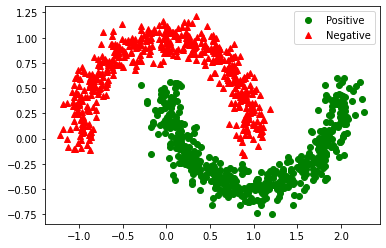

In [19]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [20]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [21]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons[:-test_size]
X_test = X_moons[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
  
# Encoding 

oneHot.fit(X_moons)
X_moons_hot = oneHot.transform(X_moons).toarray()

oneHot.fit(y_moons_column_vector)
y_moons_hot = oneHot.transform(y_moons_column_vector).toarray()

X_train_hot = X_moons_hot[:-test_size]
X_test_hot = X_moons_hot[-test_size:]
y_train_hot = y_moons_hot[:-test_size]
y_test_hot = y_moons_hot[-test_size:]

print( X_train.shape , X_test.shape , y_train.shape , y_test.shape )
print( X_train_hot.shape , X_test_hot.shape , y_train_hot.shape , y_test.shape)
print( X_moons_hot.shape , y_moons_hot.shape)

(800, 2) (200, 2) (800, 1) (200, 1)
(800, 2000) (200, 2000) (800, 2) (200, 1)
(1000, 2000) (1000, 2)


In [22]:
# to get Random N rows X , Y batches
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [23]:
m , n = X_train_hot.shape
print(m,n)

800 2000


In [24]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [25]:
reset_graph()

logdir = log_dir('logs') 
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y) )

# Cost summary - 
cost_summary = tf.summary.scalar('cost_summary',cost)

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph() )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_hot, y_train_hot, batch_size)
          
            # Running the Optimizer 
            sess.run(optimizer, feed_dict = { X : X_batch , Y : y_batch }) 
          
            # Calculating cost on current Epoch 
            c = sess.run(cost, feed_dict = {  X : X_batch , Y : y_batch }) 
            
            
          
           

In [28]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_hot , y_train_hot, batch_size)
            sess.run(optimizer, feed_dict={X: X_batch, Y: y_batch})
       
        correct_prediction = tf.equal( tf.argmax(Y_hat, 1) , tf.argmax(Y, 1) ) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) 
        
        loss_val , loss_summary , accuracy_val = sess.run([cost,cost_summary,accuracy] , { X: X_test_hot, Y: y_test_hot } )
        # loss_val = cost.eval({X: X_test_hot, Y: y_test_hot})
        # sum_loss = sum(sum(loss_val))
        step = epoch * n_batches + batch_index
        
        file_writer.add_summary(loss_summary, step)
        
    
        
        if epoch % 100 == 0:
            
            print("Epoch:", epoch, "\tLoss:", loss_val , "\tAccuracy:",accuracy_val * 100 )

    y_proba_val = Y_hat.eval(feed_dict={X: X_test_hot, Y: y_test_hot})

file_writer.flush()
file_writer.close()

/home/buckaroo/nlp/lib/python3.7/site-packages/tensorflow_core/python/summary/writer/writer.py:386: UserWarning: Attempting to use a closed FileWriter. The operation will be a noop unless the FileWriter is explicitly reopened.
  warnings.warn("Attempting to use a closed FileWriter. "


Epoch: 0 	Loss: 0.72400224 	Accuracy: 49.50000047683716
Epoch: 100 	Loss: 0.71740156 	Accuracy: 49.50000047683716
Epoch: 200 	Loss: 0.71241814 	Accuracy: 49.50000047683716
Epoch: 300 	Loss: 0.7087286 	Accuracy: 49.50000047683716
Epoch: 400 	Loss: 0.7059933 	Accuracy: 49.50000047683716
Epoch: 500 	Loss: 0.7039443 	Accuracy: 49.50000047683716
Epoch: 600 	Loss: 0.70238405 	Accuracy: 49.50000047683716
Epoch: 700 	Loss: 0.7011762 	Accuracy: 49.50000047683716
Epoch: 800 	Loss: 0.70022357 	Accuracy: 49.50000047683716
Epoch: 900 	Loss: 0.69946295 	Accuracy: 49.50000047683716
